In [2]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import dill
import scipy.io
%matplotlib inline

In [3]:
# Set up global matplotlib params. 
matplotlib.rc('font',family='serif')
matplotlib.rc('text', usetex=True)
# matplotlib.rc('font',family='serif', serif=['Times'])

# Two Player Zero Sum

In [5]:
# Load the ILQG data.
path_to_ilqg_log = '../python/logs/two_player_zero_sum/unicycle_4d_example.pkl'
fp = open(path_to_ilqg_log, 'rb')
ilqg_data = dill.load(fp)
fp.close()

# Load the HJI data. 
path_to_hji_log = '../matlab/unicycle_4d_example_hji.mat'
hji_data = scipy.io.loadmat(path_to_hji_log)

In [22]:
# Environment parameters.
goal = (100.0, 100.0)
obstacle_centers = [(100.0, 35.0), (65.0, 65.0), (25.0, 80.0)]
obstacle_radii = [10.0, 10.0, 10.0]
x_lims = (0, 150)
y_lims = (0, 125)
T = 0.1

In [7]:
def plot_obstacles(ax):
    for center, radius in zip(obstacle_centers, obstacle_radii):
        circle = plt.Circle((center[0], center[1]), radius, color='grey', fill=True, alpha=0.75)
        ax.add_artist(circle)
        # ax.text(center[0] - 1.25, center[1] - 1.25, "obs", fontsize=8)
        
def plot_goal(ax):
    ax.scatter(goal[0], goal[1], s=75, c='g', marker='*')

In [8]:
def plot_vel_traj(ax, traj, downsample, vel_lims=None):    
    xs = np.array([x[0, 0] for k, x in enumerate(traj) if k % downsample == 0])
    ys = np.array([x[1, 0] for k, x in enumerate(traj) if k % downsample == 0])
    
    # Use the velocity along the trajectory to color it.
    vel = np.array([x[3, 0] for k, x in enumerate(traj) if k % downsample == 0])
    
    points = np.array([xs, ys]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)    
    
    min_vel = vel_lims[0] if vel_lims is not None else vel.min()
    max_vel = vel_lims[1] if vel_lims is not None else vel.max()
    
    print("min_vel = {}, max_vel = {}".format(min_vel, max_vel))
    
    norm = plt.Normalize(min_vel, max_vel)
    lc = LineCollection(segments, cmap='viridis', norm=norm)

    # Set the velocity to be used for color mapping.
    lc.set_array(vel)
    lc.set_linewidth(2)
    line = ax.add_collection(lc)
    
    return line

In [13]:
def plot_iteration(ax, iteration, downsample=1):
    ax.set_title('Iteration ' + str(iteration), fontsize=18)
    
    # Plot the obstacles.
    plot_obstacles(ax)
    
    # Plot the goal.
    plot_goal(ax)
    
    ################################################################################
    # Plot the ILQG trajectory.
    ilqg_traj = ilqg_data['xs'][iteration]
    
    ilqg_xs = [x[0, 0] for k, x in enumerate(ilqg_traj) if k % downsample == 0]
    ilqg_ys = [x[1, 0] for k, x in enumerate(ilqg_traj) if k % downsample == 0]
    
    traj_line = None
    traj_line = plot_vel_traj(ax, ilqg_traj, downsample, vel_lims=(0, 30))
#     ax.plot(xs, ys, '.-b', label="ILQ game", alpha=1., markersize=2)
    ################################################################################
    
    ################################################################################
    # Plot the HJI trajectory.
    hji_traj = hji_data['traj']
    ax.plot(hji_traj[0, :], hji_traj[1, :], label='HJI', linestyle='dashed', c='b')
#     ax.plot(xs, ys, '.-b', label="ILQ game", alpha=1., markersize=2)
    ################################################################################

    ax.set_xlim(x_lims)
    ax.set_ylim(y_lims)
    ax.set_xlabel('$x(t)$', fontsize=16)
    ax.set_ylabel('$y(t)$', fontsize=16)

    # Remove the x and y ticks.
    plt.sca(ax)
    plt.xticks([])
    plt.yticks([])
    
    return traj_line

min_vel = 0, max_vel = 30
min_vel = 0, max_vel = 30
min_vel = 0, max_vel = 30
min_vel = 0, max_vel = 30


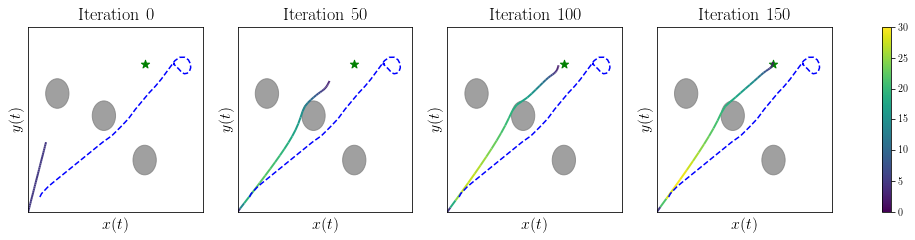

In [14]:
iterations = [0, 50, 100, 150]
fig, axes = plt.subplots(1, len(iterations))

traj_line = None
for i, axi in zip(iterations, axes):
    traj_line = plot_iteration(axi, i, downsample=3)
        
if traj_line is not None:
#     fig.colorbar(traj_line, ax=axes[-1])
    fig.colorbar(traj_line, ax=axes.ravel().tolist())

fig.set_figwidth(4 * len(iterations) + 2)
fig.set_figheight(3.4)
plt.savefig('plots/two_player_zero_sum_top.pdf', bbox_inches='tight')

In [ ]:
def plot_controls_iteration(ax, iteration, downsample=1):
    ax.set_title('Iteration ' + str(iteration), fontsize=18)
    
    ################################################################################
    # Plot the ILQG controls and disturbances.
    ilqg_us = ilqg_data['us'][iteration]
    
    ilqg_accs = [u[0][0, 0] for k, u in enumerate(ilqg_us) if k % downsample == 0]
    ilqg_omeg = [u[0][1, 0] for k, u in enumerate(ilqg_us) if k % downsample == 0]
    ilqg_ts = [T * k for k in range(len(ilqg_us)) if k % downsample == 0]
    
    ax.plot(ilqg_ts, ilqg_accs)
#     ax.plot(xs, ys, '.-b', label="ILQ game", alpha=1., markersize=2)
    ################################################################################
    
    ################################################################################
    # Plot the HJI trajectory.
    hji_traj = hji_data['traj']
    ax.plot(hji_traj[0, :], hji_traj[1, :], label='HJI', linestyle='dashed', c='b')
#     ax.plot(xs, ys, '.-b', label="ILQ game", alpha=1., markersize=2)
    ################################################################################

    ax.set_xlim(x_lims)
    ax.set_ylim(y_lims)
    ax.set_xlabel('$x(t)$', fontsize=16)
    ax.set_ylabel('$y(t)$', fontsize=16)

    # Remove the x and y ticks.
    plt.sca(ax)
    plt.xticks([])
    plt.yticks([])
    
    return traj_line

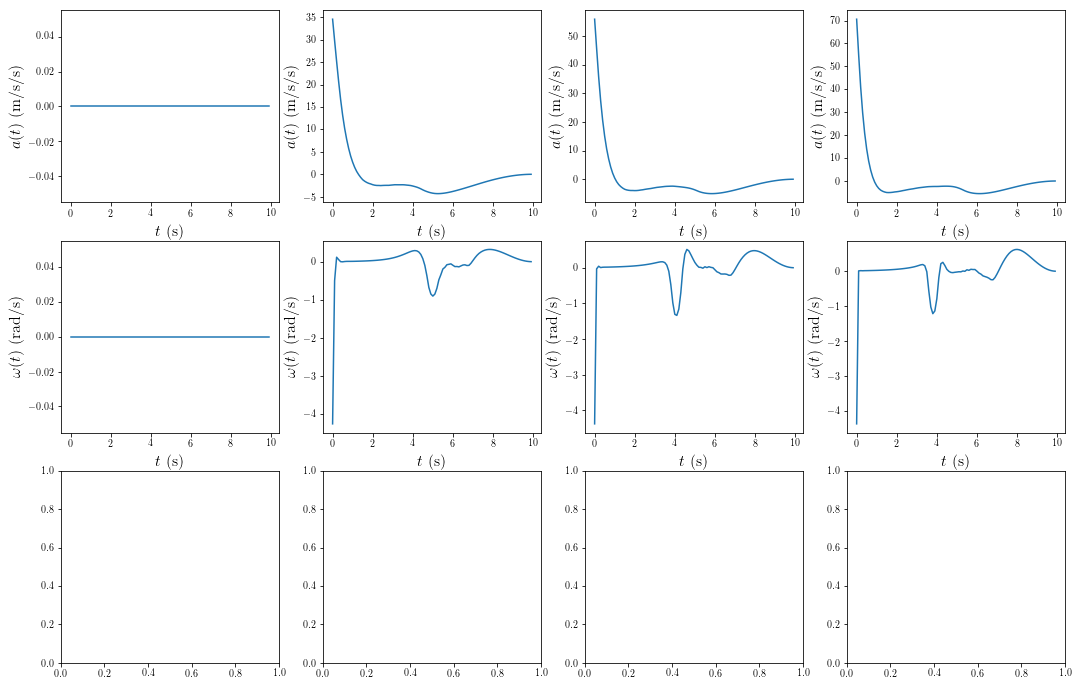

In [41]:
fig, axes = plt.subplots(3, len(iterations))

downsample = 1

for ii in range(len(iterations)):
    ilqg_us = ilqg_data['us'][iterations[ii]][0]
    
    # TODO: Add plots from the HJI 
    
    ilqg_omeg = [u[0, 0] for k, u in enumerate(ilqg_us) if k % downsample == 0]
    ilqg_accs = [u[1, 0] for k, u in enumerate(ilqg_us) if k % downsample == 0]
    ts = [T * k for k in range(len(ilqg_us)) if k % downsample == 0]
    
    # Plot ILQG/HJI acceleration control input.
    axes[0, ii].plot(ts, ilqg_accs)
    axes[0, ii].set_xlabel('$t$ (s)', fontsize=16)
    axes[0, ii].set_ylabel('$a(t)$ (m/s/s)', fontsize=16)
    
    # Plot the ILQG/HJI angular velocity control input.
    axes[1, ii].plot(ts, ilqg_omeg)
    axes[1, ii].set_xlabel('$t$ (s)', fontsize=16)
    axes[1, ii].set_ylabel('$\omega(t)$ (rad/s)', fontsize=16)
    
    ilqg_ds = ilqg_data['us'][iterations[ii]][1]
    
    ilqg_dvxs = [u[0, 0] for k, u in enumerate(ilqg_ds) if k % downsample == 0]
    ilqg_dvys = [u[1, 0] for k, u in enumerate(ilqg_ds) if k % downsample == 0]
    
    # Plot the ILQG/HJI disturbance inputs. 
    axes[2, ii].plot(ts, ilqg_dvxs)
    axes[2, ii].plot(ts, ilqg_dvys)
    axes[2, ii].set_xlabel('$t$ (s)', fontsize=16)
    axes[2, ii].set_ylabel('$\d_1(t), d_t')
    
fig.set_figwidth(4 * len(iterations) + 2)
fig.set_figheight(12)
plt.savefig('plots/two_player_zero_sum_ctrl_dstb.pdf', bbox_inches='tight')

In [37]:
ilqg_data["us"][1][0]

[array([[-0.46436714],
        [ 0.85691459]]), array([[-0.37855635],
        [ 0.7837124 ]]), array([[-0.30168034],
        [ 0.71412376]]), array([[-0.23320956],
        [ 0.64823473]]), array([[-0.1726467 ],
        [ 0.58600251]]), array([[-0.11950893],
        [ 0.52730105]]), array([[-0.07331869],
        [ 0.4719567 ]]), array([[-0.03359974],
        [ 0.4197748 ]]), array([[1.23465167e-04],
        [3.70558568e-01]]), array([[0.02832455],
        [0.3241216 ]]), array([[0.05147298],
        [0.28029533]]), array([[0.07003144],
        [0.23893248]]), array([[0.0844529 ],
        [0.19990773]]), array([[0.09517781],
        [0.1631163 ]]), array([[0.10263135],
        [0.12847138]]), array([[0.10722088],
        [0.09590084]]), array([[0.1093336 ],
        [0.06534371]]), array([[0.10933448],
        [0.03674683]]), array([[0.10756456],
        [0.01006179]]), array([[ 0.1043396 ],
        [-0.01475763]]), array([[ 0.0999491 ],
        [-0.03775753]]), array([[ 0.09465575],
    